In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("train.csv",sep=",")

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,2,3,4,5,6,7,8,9,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = data['label']
y = y.values
y = y.reshape(len(y),1)

In [4]:
data = data.drop(['label'], axis =1)

In [5]:
y.shape

(42000, 1)

In [6]:
data.head()
rows = data.shape[0]
matrix_dim = 28

In [7]:
data.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,2,3,4,5,6,7,8,9,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = data.values
data_new = data.reshape(rows,matrix_dim,matrix_dim)

In [9]:
data_new.shape

(42000, 28, 28)

In [10]:
data_new[0,0:3,1:4]

array([[2, 3, 4],
       [0, 0, 0],
       [0, 0, 0]])

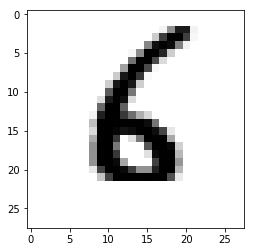

In [11]:
plt.imshow(data_new[45],cmap='gray_r')
plt.show()

In [12]:
data_new[45].shape

(28, 28)

In [13]:
def filt(n):
    a = np.random.rand(n,n)
    return a

In [14]:
W = filt(3)

In [15]:
def conv_data(data_new_forw,stride,pad,W):
    #new_filter = filt(filter_shape)
    new_matrix_size = (int((data_new_forw.shape[0] - W.shape[0] +2*pad)/stride) +1)
    filtered_matrix = np.zeros(shape=(new_matrix_size,new_matrix_size))
    for i in range(len(filtered_matrix)):
        for j in range(len(filtered_matrix)):
            filtered_matrix[i][j] = np.sum(data_new_forw[i*stride:i*stride+W.shape[0],j*stride:j*stride+W.shape[0]]*W)
    cache = (data_new_forw,W,stride)
    return cache,filtered_matrix
    #else:
     #   return ('Enter valid parameters')

In [16]:
W.shape

(3, 3)

In [17]:
cache,filtera = conv_data(data_new[45],1,0,W)
print (filtered_matrix.shape)

NameError: name 'filtered_matrix' is not defined

In [21]:
def relu_funct(data_new):
    data_out = np.maximum(0,data_new)
    return data_out

In [22]:
a = relu_funct(filtera)
print (a.shape)

(26, 26)


In [23]:
def pooling_matrix(data_new,stride,pad,filter_shape):
    a = []
    new_pooling_filter = filt(filter_shape)
    new_matrix_size = (int(int(data_new.shape[0] - filter_shape +2*pad)/stride) +1)
    pooling_matrix = np.zeros(shape=(new_matrix_size,new_matrix_size))
    for i in range(len(pooling_matrix)):
        for j in range(len(pooling_matrix)):
            pooling_matrix[i][j] = np.max(data_new[i*stride:i*stride+filter_shape,j*stride:j*stride+filter_shape])
            #code for storing the index of max value here
    return pooling_matrix,pooling_matrix.shape

In [24]:
pool_dat,pool_size = pooling_matrix(a,2,0,2)
print (pool_dat) #use in pooling backpropogation

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.87453761e+01
  6.49508132e+02 8.54322509e+02 2.94457960e+02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.74653716e-01 2.25194625e+02 1.00404620e+03
  1.20010120e+03 1.11690747e+03 2.15509231e+02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.21887888e+02 1.10796893e+03 1.21250733e+03
  9.08795023e+02 2.05540692e+02 3.16798980e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.04258432e+02 9.94213577e+02 1.23265645e+03 8.11756817e+02
  7.91711337e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.78294658e+00
  7.12597273e+02 1.25331169e+03 1.03218473e+03 8.92764426e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

In [25]:
def flat_funct(data_new):
    data_flatten = data_new.flatten()
    data_flatten = data_flatten.reshape(1,len(data_flatten))
    return data_flatten

In [26]:
flatten_d = flat_funct(pool_dat)
print (flatten_d)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.87453761e+01
  6.49508132e+02 8.54322509e+02 2.94457960e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.74653716e-01 2.25194625e+02
  1.00404620e+03 1.20010120e+03 1.11690747e+03 2.15509231e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21887888e+02
  1.10796893e+03 1.21250733e+03 9.08795023e+02 2.05540692e+02
  3.16798980e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.04258432e+02
  9.94213577e+02 1.23265645e+03 8.11756817e+02 7.91711337e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.78294658e+00
  7.12597273e+02 1.25331169e+03 1.03218473e+03 8.92764426e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

In [27]:
W2 = np.random.rand(flatten_d.shape[1],np.unique(y).size)
print (W2.shape)
B = np.random.rand(1,np.unique(y).size)
def FCC(data_flatten,W2,B):
    FCC = np.dot(data_flatten,W2)+B
    return FCC

(169, 10)


In [28]:
FCC_d = FCC(flatten_d,W2,B)
FCC_d = FCC_d/1000
print (FCC_d)

[[25.93829548 27.20947771 21.81292218 26.48917418 23.81644001 23.71320213
  25.14025034 25.04033315 23.05625356 23.12941762]]


In [29]:
def softmax(FCC_data):
    e_x = np.exp(FCC_data - np.max(FCC_data))
    return e_x / e_x.sum()
    

In [30]:
soft_m = softmax(FCC_d)
print (soft_m)


[[0.13301825 0.47421868 0.00214924 0.23075696 0.0159368  0.0143736
  0.05988591 0.0541915  0.00745172 0.00801735]]


In [31]:
def cross_entropy(X,y):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    y is the training y
    """
    m = 1 #=number of samples
    p = softmax(X)
    #print (p)
    
    log_likelihood = -np.log(p[range(m),y])
    #print (log_likelihood)
    loss = np.sum(log_likelihood) / m
    return loss

In [32]:
cross_en = cross_entropy(FCC_d,y[45])
print (cross_en)

2.8153140827887664


# delta cross entropy

In [33]:
def delta_cross_entropy(X,y):
    #i didn't understand this
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    """
    m = 1 #y.shape[0]
    grad = softmax(X)
    grad[range(m),y] -= 1
    grad = grad/m
    return grad



In [34]:
del_cross = delta_cross_entropy(FCC_d,y[45])
print (del_cross)

[[ 0.13301825  0.47421868  0.00214924  0.23075696  0.0159368   0.0143736
  -0.94011409  0.0541915   0.00745172  0.00801735]]


In [35]:
def backprog_dw2(soft_max,flatten_data):
    dw2 = np.dot((soft_max.T),flatten_data)
    return dw2
    

In [36]:
dw2 = backprog_dw2(soft_m,flatten_d)
print (dw2.shape)

(10, 169)


In [37]:
def mask(x):
    mask = x == np.max(x)
    return mask.astype(int)

In [38]:
W2

array([[9.40293631e-01, 8.84947471e-04, 5.42118740e-01, ...,
        6.70406912e-01, 8.97172938e-01, 3.24998889e-01],
       [9.97913133e-01, 7.96954349e-01, 8.37409083e-01, ...,
        8.50788302e-01, 4.13157982e-02, 1.92293032e-03],
       [2.30946807e-01, 8.32437264e-01, 1.74270573e-01, ...,
        6.72527028e-01, 2.89671646e-02, 6.53550031e-01],
       ...,
       [6.49543768e-01, 3.49711715e-01, 3.64272603e-01, ...,
        4.52487673e-01, 7.23221493e-01, 9.84643303e-01],
       [8.57973173e-01, 4.92728071e-01, 8.82127228e-01, ...,
        7.99360219e-01, 3.62221183e-01, 2.34543483e-01],
       [7.30106560e-02, 8.51937008e-01, 3.90408140e-01, ...,
        4.61017773e-01, 4.47366561e-01, 9.81299391e-01]])

In [39]:
def backprog_pool(convo_out_data,soft_max, W2,stride, pool_prev_size,filter_prev_size):#pool_prev_size = pool_size
    gradient_prev = np.dot(W2,soft_max.T-1)
    #print (gradient_prev.shape)
    gradient_prev = gradient_prev.reshape((pool_prev_size,pool_prev_size))
    #print (gradient_prev.shape)
    for i in range (len(gradient_prev)):
        for j in range (len(gradient_prev)):
            #b = (np.multiply(mask(convo_out_data[i*stride:i*stride+filter_prev_size,j*stride:j*stride+filter_prev_size]),gradient_prev[i][j]))
            #print (b.shape)
            #(data_new[i:i+filter_prev_size,j:j+filter_prev_size]) += np.multiply(mask(data_new[i:i+filter_prev_size,j:j+filter_prev_size]),gradient_prev[i][j])
            np.add((convo_out_data[i*stride:i*stride+filter_prev_size,j*stride:j*stride+filter_prev_size]),(np.multiply(mask(convo_out_data[i*stride:i*stride+filter_prev_size,j*stride:j*stride+filter_prev_size]),gradient_prev[i][j])),out=(convo_out_data[i*stride:i*stride+filter_prev_size,j*stride:j*stride+filter_prev_size]),casting = "unsafe")
    return (convo_out_data) #this is the input for relu backward

In [40]:
backprogpool = backprog_pool(filtera,soft_m,W2,2,13,2)
print (backprogpool)

[[-6.21167535e+00 -6.21167535e+00 -4.44599016e+00 -4.44599016e+00
  -3.86891901e+00 -3.86891901e+00 -4.11198772e+00 -4.11198772e+00
  -5.36414014e+00 -5.36414014e+00 -5.42677538e+00 -5.42677538e+00
  -6.40351578e+00 -6.40351578e+00  0.00000000e+00  9.27648860e-01
   1.87953196e+01  1.21123171e+02  2.81186497e+02  3.33560361e+02
   1.48945090e+02  7.30236352e+00 -3.45301687e+00 -3.45301687e+00
  -4.33170565e+00 -4.33170565e+00]
 [-6.21167535e+00 -6.21167535e+00 -4.44599016e+00 -4.44599016e+00
  -3.86891901e+00 -3.86891901e+00 -4.11198772e+00 -4.11198772e+00
  -5.36414014e+00 -5.36414014e+00 -5.42677538e+00 -5.42677538e+00
  -6.40351578e+00 -6.40351578e+00  4.30091744e+00  6.49396702e+01
   3.18984824e+02  6.45584307e+02  8.50304849e+02  6.89413975e+02
   2.89501167e+02  1.33008439e+01 -3.45301687e+00 -3.45301687e+00
  -4.33170565e+00 -4.33170565e+00]
 [-5.38835855e+00 -5.38835855e+00 -3.51037527e+00 -3.51037527e+00
  -5.63913147e+00 -5.63913147e+00 -3.35411794e+00 -3.35411794e+00
  -5.2

In [41]:
def backprog_relu(relu_data):
    relu_back = np.zeros(shape = (len(relu_data),len(relu_data)))
    for i in range(len(relu_data)):
        for j in range(len(relu_data)):
            if relu_data[i][j] >= 0:
                relu_back[i][j] = 1
            else:
                relu_back[i][j] = 0
    relu_back = np.multiply(relu_back,relu_data)
    return relu_back

In [42]:
relu_back = backprog_relu(backprogpool)
print ((relu_back.shape))

(26, 26)


In [43]:
def conv_backward(cache,relu_back_data):
    (data_new_forw,new_filter,stride) =cache
    temp = np.zeros(shape=new_filter.shape)
    for i in range((relu_back_data.shape[0])):
        for j in range((relu_back_data.shape[1])):
            #temp = np.multiply(data_new_forw[i*stride:i*stride+new_filter.shape[0],j*stride:j*stride+new_filter.shape[0]],new_filter)
            temp += np.multiply(np.multiply(data_new_forw[i*stride:i*stride+new_filter.shape[0],j*stride:j*stride+new_filter.shape[0]],new_filter),relu_back_data[i][j])            
    return temp
    
    

In [44]:
convo_temp = conv_backward(cache,relu_back)
print (convo_temp)

[[ 5074198.19798558 19927564.23038502  7880921.37713681]
 [16671227.99582037 23121027.0336558  19334338.90476403]
 [13876308.9778066  20333129.66968134  1729778.04681538]]


In [45]:
iteration = 1000 
alpha = 0.005
W = filt(3)
for i in range(iteration):
    cache,filtera = conv_data(data_new[45],1,0,W)
    a = relu_funct(filtera)
    pool_dat,pool_size = pooling_matrix(a,2,0,2)
    flatten_d = flat_funct(pool_dat)
    W2 = np.random.rand(flatten_d.shape[1],np.unique(y).size)
    B = np.random.rand(1,np.unique(y).size)
    FCC_d = FCC(flatten_d,W2,B)
    FCC_d = FCC_d/1000
    soft_m = softmax(FCC_d)
    cross_en = cross_entropy(FCC_d,y[45])
    del_cross = delta_cross_entropy(FCC_d,y[45])
    print ('cross_en',cross_en)
    
    dw2 = backprog_dw2(soft_m,flatten_d)
    backprogpool = backprog_pool(filtera,soft_m,W2,2,13,2)
    relu_back = backprog_relu(backprogpool)
    convo_temp = conv_backward(cache,relu_back)
    #print ('convo',convo_temp)
    W = W - alpha*convo_temp
    #print ('W',W)

cross_en 3.289361526132309
cross_en 2.3030077230467647
cross_en 2.3023950658192063
cross_en 2.3023353264670705
cross_en 2.302614596820732
cross_en 2.3029008353413007
cross_en 2.303143798512919
cross_en 2.3023197804174904
cross_en 2.302361694781509
cross_en 2.3026075710359732
cross_en 2.3029176343561404
cross_en 2.3023765819344644
cross_en 2.302677406586722
cross_en 2.3021984634589225
cross_en 2.3026039538652814
cross_en 2.3023531774067645
cross_en 2.3022554897178718
cross_en 2.302280246930235
cross_en 2.3029504776192753
cross_en 2.3024159011302943
cross_en 2.3023675164369917
cross_en 2.3024098932109927
cross_en 2.302662216085319
cross_en 2.3029222149681394
cross_en 2.3024147293854695
cross_en 2.3028762834104706
cross_en 2.3027253358831605
cross_en 2.302415216010211
cross_en 2.3028507929487176
cross_en 2.302617867524954
cross_en 2.3021849330135775
cross_en 2.3026016159859735
cross_en 2.3025076287454094
cross_en 2.3022160928660713
cross_en 2.302577469847285
cross_en 2.302564141318787
cro

cross_en 2.302764000413658
cross_en 2.3022577357167617
cross_en 2.302692929449441
cross_en 2.3027552730192493
cross_en 2.3026180932887286
cross_en 2.302179319066932
cross_en 2.3030562190305752
cross_en 2.3029175677978526
cross_en 2.3028708699294165
cross_en 2.3025421480514363
cross_en 2.302957926415038
cross_en 2.3025179487043523
cross_en 2.302214024354896
cross_en 2.302500866572085
cross_en 2.3025721088324462
cross_en 2.302790454831727
cross_en 2.30231708976355
cross_en 2.3030176341977326
cross_en 2.3025143302647226
cross_en 2.302887107080137
cross_en 2.30231353561454
cross_en 2.3024880893156556
cross_en 2.3026448603454064
cross_en 2.3022660575652596
cross_en 2.3024138091808255
cross_en 2.3027456631001257
cross_en 2.3026428574555533
cross_en 2.3024037144949516
cross_en 2.3027955024528337
cross_en 2.302549926355367
cross_en 2.3028106870267013
cross_en 2.3023243611626487
cross_en 2.302699309478824
cross_en 2.3025710471553533
cross_en 2.3021650555334574
cross_en 2.302801274647785
cross_e

cross_en 2.3029633821407334
cross_en 2.302688171808434
cross_en 2.302328862930239
cross_en 2.3027338926438925
cross_en 2.302316597175868
cross_en 2.302374380308993
cross_en 2.302481797575807
cross_en 2.3021603704472664
cross_en 2.3023370276599118
cross_en 2.3027982124469313
cross_en 2.303062371021323
cross_en 2.3022421260192325
cross_en 2.3024756366427104
cross_en 2.3026393660348052
cross_en 2.3028744119970095
cross_en 2.302353693550703
cross_en 2.3028385211654703
cross_en 2.302449324283757
cross_en 2.3025029178390457
cross_en 2.302714552830623
cross_en 2.302784813083726
cross_en 2.302552919134829
cross_en 2.3024398813012277
cross_en 2.302254273499223
cross_en 2.3024300536851445
cross_en 2.3026490550700234
cross_en 2.302610282550985
cross_en 2.302565949824346
cross_en 2.3028788236376707
cross_en 2.3023242512636304
cross_en 2.3031381129790796
cross_en 2.3020579474883647
cross_en 2.3023149361086293
cross_en 2.302329254346068
cross_en 2.3022665990271864
cross_en 2.3026426483519105
cross_e

cross_en 2.3027341800570458
cross_en 2.3027943166866094
cross_en 2.302881592800279
cross_en 2.3026778702668493
cross_en 2.302870760994034
cross_en 2.3027507479229126
cross_en 2.3021364913257654
cross_en 2.3025235544351683
cross_en 2.3028534016396254
cross_en 2.302321441708183
cross_en 2.302520220527212
cross_en 2.302912511141912
cross_en 2.3022286587170115
cross_en 2.302370875375952
cross_en 2.3024931734835126
cross_en 2.3031629437960794
cross_en 2.3020996390430524
cross_en 2.302395809286025
cross_en 2.302919823354437
cross_en 2.30228240947192
cross_en 2.3024166537703845
cross_en 2.302831207226818
cross_en 2.3026463302353593
cross_en 2.3026888606630505
cross_en 2.302300237744854
cross_en 2.302556791825723
cross_en 2.3025760160785893
cross_en 2.3022678595686306
cross_en 2.3025678842690085
cross_en 2.302426599594873
cross_en 2.302583454080589
cross_en 2.302419198362585
cross_en 2.30229705598369
cross_en 2.3028447704966557
cross_en 2.302831367860135
cross_en 2.302541142536138
cross_en 2.3